### Analysis & Visualization of 80 Cereals

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
food = pd.read_csv('cereal.csv')
food.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## Project Motivation

#### Can we use this dataset to recommend Cereals to Diabetic Patients or advise on dietary supplementsm

### Research Questions

- 1. What Products are rich in Carbohydrate, Protein, Vitamin & Mineral

- 2. Find products not suitbale for diabetic patients (above 60g)

- 3. Find products suitbale for diabetic patients (equal or below 60g)

- 4. Cereals with highest rating

### Assessment

> Information of the dataset

In [51]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


> Genreally there our data is clean 

> There are no null values and each feature have the correct datatypes

#### Research Question 1

1. What Products are rich in Carbohydrate, Protein, Vitamin & Mineral

> Crabohydrate Foods

> Define

>> Group food types that are of carbohydrate and plot distribution of top 5 and lowest 5 

In [52]:
carbo_foods = food[['name','carbo', 'sugars', 'fiber']]

In [53]:
carbo_foods

,name,carbo,sugars,fiber
0,100% Bran,5.0,6,10.0
1,100% Natural Bran,8.0,8,2.0
2,All-Bran,7.0,5,9.0
3,All-Bran with Extra Fiber,8.0,0,14.0
4,Almond Delight,14.0,8,1.0
...,...,...,...,...
72,Triples,21.0,3,0.0
73,Trix,13.0,12,0.0
74,Wheat Chex,17.0,3,3.0
75,Wheaties,17.0,3,3.0


> Sum up constituent of carbohydrates

In [54]:
carbo_foods['sum'] = carbo_foods.carbo + carbo_foods.sugars + carbo_foods.fiber

/home/patrick/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
carbo_foods

,name,carbo,sugars,fiber,sum
0,100% Bran,5.0,6,10.0,21.0
1,100% Natural Bran,8.0,8,2.0,18.0
2,All-Bran,7.0,5,9.0,21.0
3,All-Bran with Extra Fiber,8.0,0,14.0,22.0
4,Almond Delight,14.0,8,1.0,23.0
...,...,...,...,...,...
72,Triples,21.0,3,0.0,24.0
73,Trix,13.0,12,0.0,25.0
74,Wheat Chex,17.0,3,3.0,23.0
75,Wheaties,17.0,3,3.0,23.0


> melt features into one single column

In [56]:
carbo_foods2 = carbo_foods.copy()

In [57]:
carbo_foods2=carbo_foods2.melt(id_vars=['name', 'sum'], value_vars=['carbo', 'sugars', 'fiber'], var_name='Carbohydrates', value_name='grams')

In [58]:
carbo_foods2

,name,sum,Carbohydrates,grams
0,100% Bran,21.0,carbo,5.0
1,100% Natural Bran,18.0,carbo,8.0
2,All-Bran,21.0,carbo,7.0
3,All-Bran with Extra Fiber,22.0,carbo,8.0
4,Almond Delight,23.0,carbo,14.0
...,...,...,...,...
226,Triples,24.0,fiber,0.0
227,Trix,25.0,fiber,0.0
228,Wheat Chex,23.0,fiber,3.0
229,Wheaties,23.0,fiber,3.0


> Top 5 Carbo Cereals

In [59]:
carbo_foods2 =carbo_foods2.groupby(['name', 'Carbohydrates', 'sum'])['grams'].sum()

In [60]:
carbo_foods2

name                 Carbohydrates  sum 
100% Bran            carbo          21.0     5.0
                     fiber          21.0    10.0
                     sugars         21.0     6.0
100% Natural Bran    carbo          18.0     8.0
                     fiber          18.0     2.0
                                            ... 
Wheaties             fiber          23.0     3.0
                     sugars         23.0     3.0
Wheaties Honey Gold  carbo          25.0    16.0
                     fiber          25.0     1.0
                     sugars         25.0     8.0
Name: grams, Length: 231, dtype: float64

In [61]:
carbo_foods2= pd.DataFrame(carbo_foods2).sort_values(by='grams', ascending=False).reset_index()

In [62]:
carbo_foods2

,name,Carbohydrates,sum,grams
0,Rice Chex,carbo,25.0,23.0
1,Corn Chex,carbo,25.0,22.0
2,Rice Krispies,carbo,25.0,22.0
3,Crispix,carbo,25.0,21.0
4,Cream of Wheat (Quick),carbo,22.0,21.0
...,...,...,...,...
226,Shredded Wheat,sugars,19.0,0.0
227,Cocoa Puffs,fiber,25.0,0.0
228,Lucky Charms,fiber,24.0,0.0
229,Quaker Oatmeal,carbo,0.7,-1.0


In [66]:
top5_carbo = carbo_foods2.head(15)

In [67]:
top5_carbo

,name,Carbohydrates,sum,grams
0,Rice Chex,carbo,25.0,23.0
1,Corn Chex,carbo,25.0,22.0
2,Rice Krispies,carbo,25.0,22.0
3,Crispix,carbo,25.0,21.0
4,Cream of Wheat (Quick),carbo,22.0,21.0
5,Nutri-Grain Almond-Raisin,carbo,31.0,21.0
6,Total Corn Flakes,carbo,24.0,21.0
7,Triples,carbo,24.0,21.0
8,Corn Flakes,carbo,24.0,21.0
9,Kix,carbo,24.0,21.0


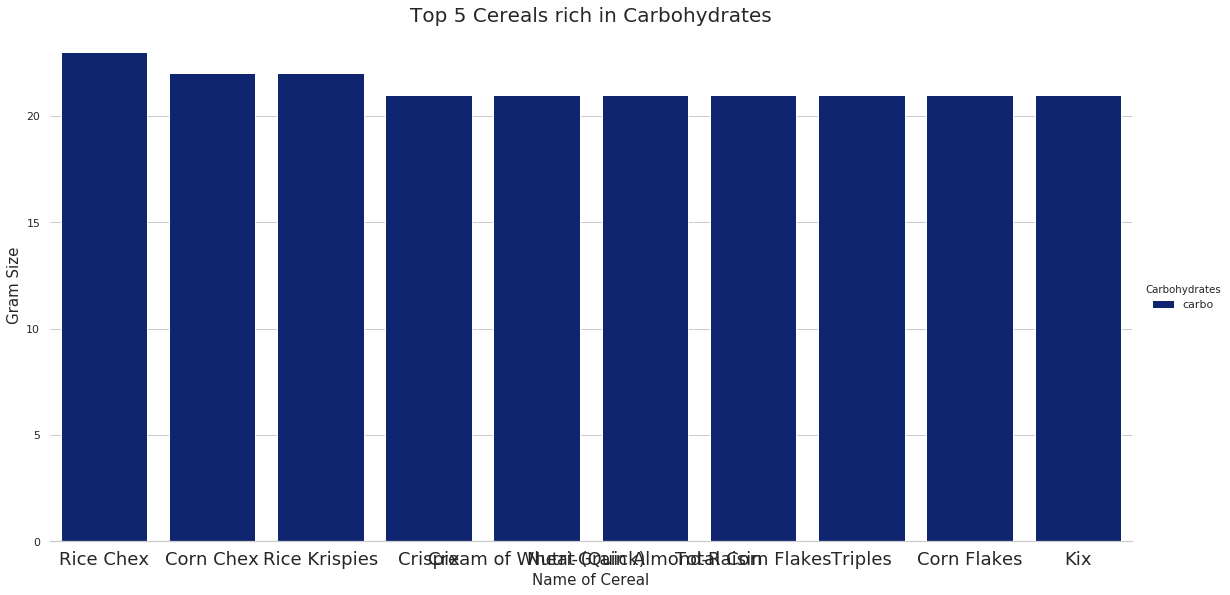

In [65]:
sns.set(style="whitegrid")
plot = sns.catplot(x='name', y='grams',hue = 'Carbohydrates',  data=top5_carbo,
           aspect=2, kind='bar', height=8, palette=["#001C7F", "#B1400D", '#12711C'])

plt.title('Top 5 Cereals rich in Carbohydrates', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.xlabel('Name of Cereal', fontsize=15)
plt.ylabel('Gram Size', fontsize=15)
plot.despine(left=True)
plt.savefig(format='png', fname='visuals2/top_carbo.png')
plt.show()

> Low 5 Carbo Foods

In [ ]:
low5_carbo = carbo_foods2.tail(15)

In [ ]:
low5_carbo

In [ ]:
sns.set(style="whitegrid")
plot = sns.catplot(x='name', y='grams',hue = 'Carbohydrates',  data=low5_carbo,
           aspect=2, kind='bar', height=8, palette=["#001C7F", "#B1400D", '#12711C'])

plt.title('Lowest 5 Cereals rich in Carbohydrates', fontsize=20)
plt.xticks(rotation=10, fontsize=18)
plt.xlabel('Name of Cereal', fontsize=15)
plt.ylabel('Gram Size', fontsize=15)
plot.despine(left=True)
plt.savefig(format='png', fname='visuals2/low_carbo.png')
plt.show()

> Protein Foods

> Define

>> Group food types that are of protein and plot distribution of top 5 and lowest 5 

In [ ]:
protein_foods = food[['name','protein' ]]

In [ ]:
protein_foods

In [ ]:
protein_foods2 = protein_foods.copy()

In [ ]:
top5_protein = pd.Series(protein_foods2.groupby('name')['protein'].sum()).sort_values(ascending=False).reset_index().head()

In [ ]:
top5_protein

In [ ]:
plt.subplots(figsize=(12, 10))
plt.bar(x=top5_protein.name, height=top5_protein.protein)
plt.title("Top 5 Cereals rich in Protein", fontsize=20)
plt.xticks(rotation=10, fontsize=18)
plt.xlabel('Name of Cereal', fontsize=15)
plt.ylabel('Gram Size', fontsize=15)
plot.despine(left=True)
plt.savefig(format='png', fname='visuals2/top_protein.png')
plt.show()

In [ ]:
low5_protein = pd.Series(protein_foods2.groupby('name')['protein'].sum()).sort_values(ascending=False).reset_index()

In [ ]:
low5_protein.protein.unique()

In [ ]:
avg_protein = low5_protein.protein.mean()
avg_protein

In [ ]:
low_protein = low5_protein.query('protein < 2.5' ).name
low_protein

##### 

> Vitamin Foods

> Define

>> Foods that have are rich or lack in  vitamins

In [ ]:
vitamin_foods = food[['name', 'vitamins' ]]

In [ ]:
no_vitmain_foods = vitamin_foods.query('vitamins == 0') 

In [ ]:
no_vitmain_foods

In [ ]:
rich_vitmain_foods = vitamin_foods.query('vitamins == 100') 

### Top Foods Rich in Vitamins

In [ ]:
rich_vitmain_foods

In [ ]:
mineral_foods = food[['name', 'potass','sodium']]

> Mineral Foods

> Define

>> Top 5 Cereals and LOwest 5 Cereals rich in Minerals

> Add constituents of minerals

In [ ]:
mineral_foods['sum'] = mineral_foods.potass + mineral_foods.sodium

In [ ]:
mineral_foods

> melt mineral columns

In [ ]:
mineral_foods2 = mineral_foods.copy()

In [ ]:
mineral_foods2 = mineral_foods2.melt(id_vars=['name', 'sum'], value_vars=['potass', 'sodium'], var_name='minerals', value_name='grams')

In [ ]:
mineral_foods2

In [ ]:
mineral_foods2 =(mineral_foods2.groupby(['name', 'minerals', 'sum'])['grams'].sum()).reset_index()

In [ ]:
mineral_foods2

In [ ]:
mineral_foods2=pd.DataFrame(mineral_foods2).sort_values(by=['sum'], ascending=False) #= 

In [ ]:
mineral_foods2

In [ ]:
top5_minerals = mineral_foods2.head(10)

In [ ]:
top5_minerals

### Top 5 Cereals Rich in Minerals

In [ ]:
sns.set(style="whitegrid")
plot = sns.catplot(x='name', y='grams',hue = 'minerals',  data=top5_minerals,
           aspect=2, kind='bar', height=10, palette=["#001C7F", "#B1400D"])

plt.title('Top 5 Cereals rich in Minerals', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.xlabel('Name of Cereal', fontsize=18)
plt.ylabel('Gram Size', fontsize=19)
plot.despine(left=True)
plt.savefig(format='png', fname='visuals2/top_minerals.png')
plt.show()

### Lowest 5 Minerals Cereals

In [ ]:
low5_minerals = mineral_foods2.tail(10)

In [ ]:
low5_minerals

In [ ]:
sns.set(style="whitegrid")
plot = sns.catplot(x='name', y='grams',hue = 'minerals',  data=low5_minerals,
           aspect=2, kind='bar', height=10, palette=["#001C7F", "#B1400D"])

plt.title('Lowest 5 Cereals rich in Minerals', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.xlabel('Name of Cereal', fontsize=18)
plt.ylabel('Gram Size', fontsize=19)
plot.despine(left=True)
plt.savefig(format='png', fname='visuals2/low_minerals.png')
plt.show()

### Research Question 3


- Find products not suitbale for diabetic patients (above 60g)

- Find products suitbale for diabetic patients (equal or below 60g)


In [ ]:
diabetic_foods = carbo_foods2.query('sum > 60')

In [ ]:
diabetic_foods

In [ ]:
non_diabetic_foods = carbo_foods2.query('sum < 60')

In [ ]:
top_non_diabetic_foods=non_diabetic_foods.sort_values('sum', ascending=False).head(15)

In [ ]:
top_non_diabetic_foods

### Top 5 Non - Diabetic Patients

In [ ]:
sns.set(style="whitegrid")
plot = sns.catplot(x='name', y='grams',hue = 'Carbohydrates',  data=top_non_diabetic_foods,
           aspect=2, kind='bar', height=10, palette=["#001C7F", "#B1400D"])

plt.title('Top 5 Non Diabetic Patients', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.xlabel('Name of Cereal', fontsize=18)
plt.ylabel('Gram Size', fontsize=19)
plot.despine(left=True)
plt.savefig(format='png', fname='visuals2/top_non_diabetic.png')
plt.show()

In [ ]:
foods